In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
print(df.head())
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
(1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          obje

From our data summary, we can see that there are no null values indicating we are working with 
a clean dataset. Additionally, the scores in math, reading, and writing contain very similar 
averages.

In [4]:
#Create function to display distribution pairplot
def distribution(dataset,variable):
    '''
    Args:
        dataset: Include the DataFrame here
        variable: Include the column from dataframe used for color encoding
    Returns:
        sns pairplot with color encoding
    '''
    g = sns.pairplot(data = dataset, hue = variable,palette='husl')
    g.fig.suptitle('Graph showing distribution between scores and {}'.format(variable), fontsize=20)
    g.fig.subplots_adjust(top=0.9)
    return g

print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


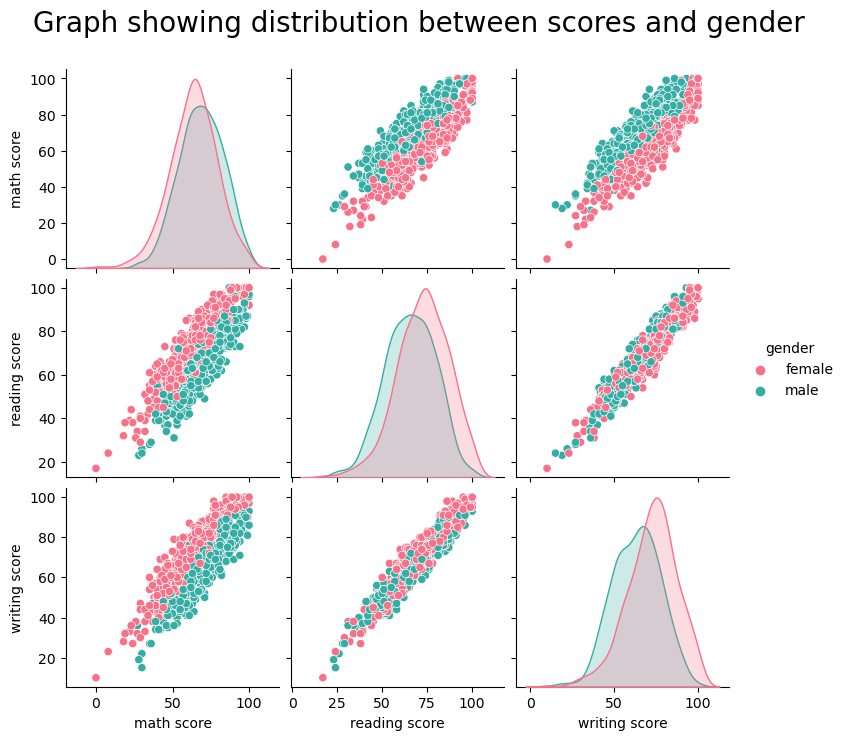

In [5]:
distribution(df, 'gender')
plt.show()

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


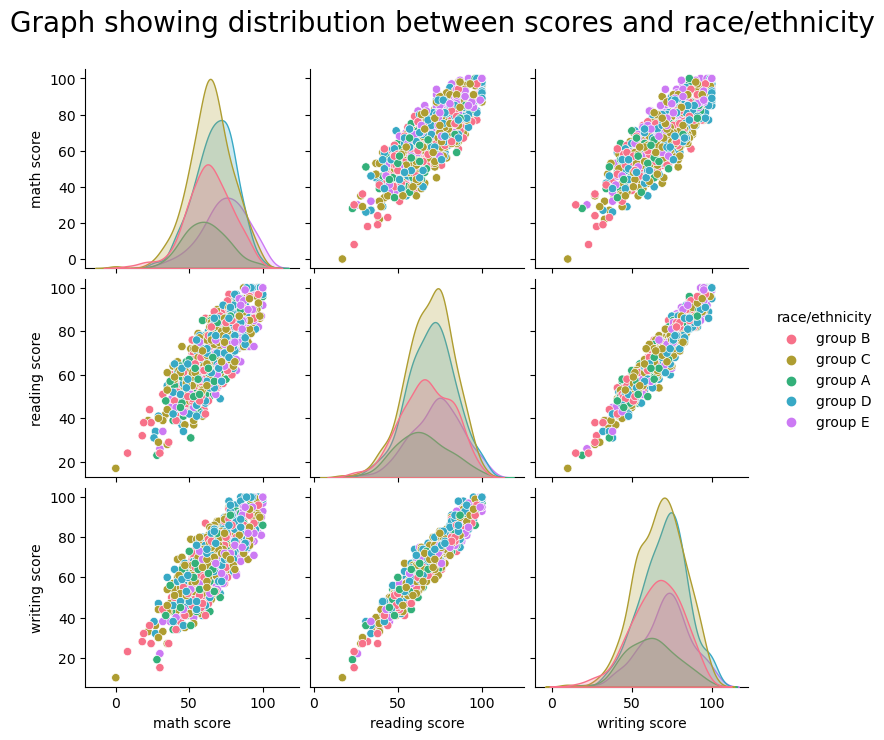

In [6]:
# Females perform higher in reading and writing while males perform higher on math.

#score and race
distribution(df,'race/ethnicity')
plt.show()

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


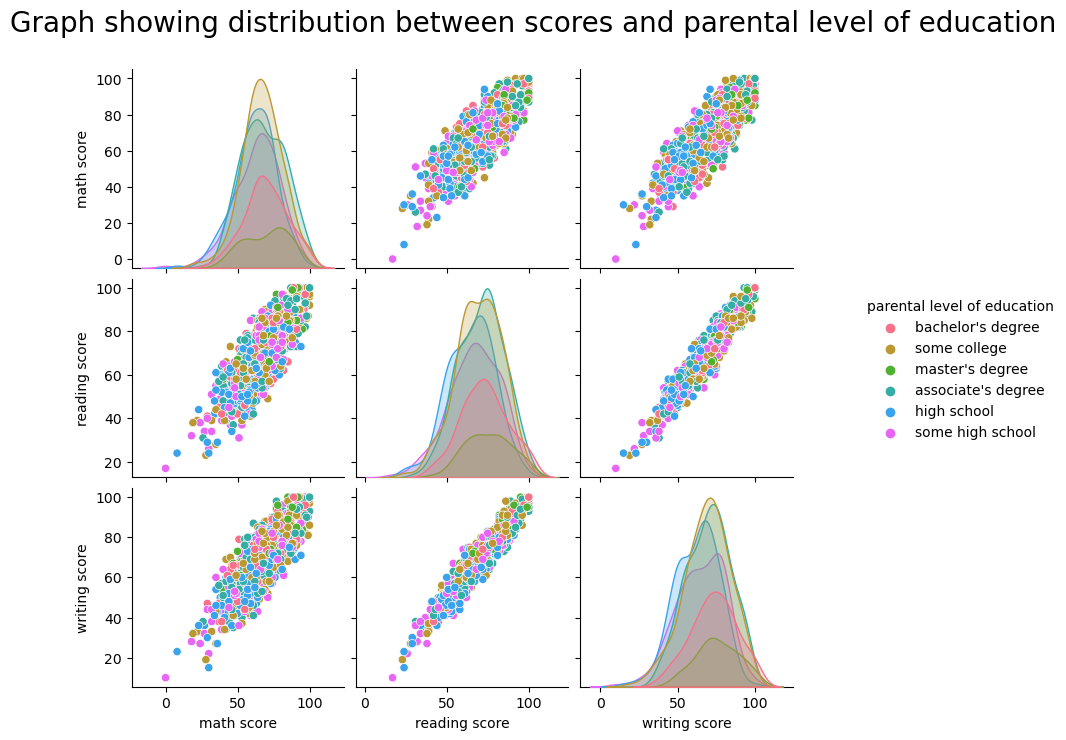

"\nThere appears to be a trend in parental education level and student's score. \nThe variance between the different catergorical data indicates this is not a major factor.\n"

In [7]:
#score and parental education level
distribution(df,'parental level of education')
plt.show()

"""
There appears to be a trend in parental education level and student's score. 
The variance between the different catergorical data indicates this is not a major factor.
"""

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


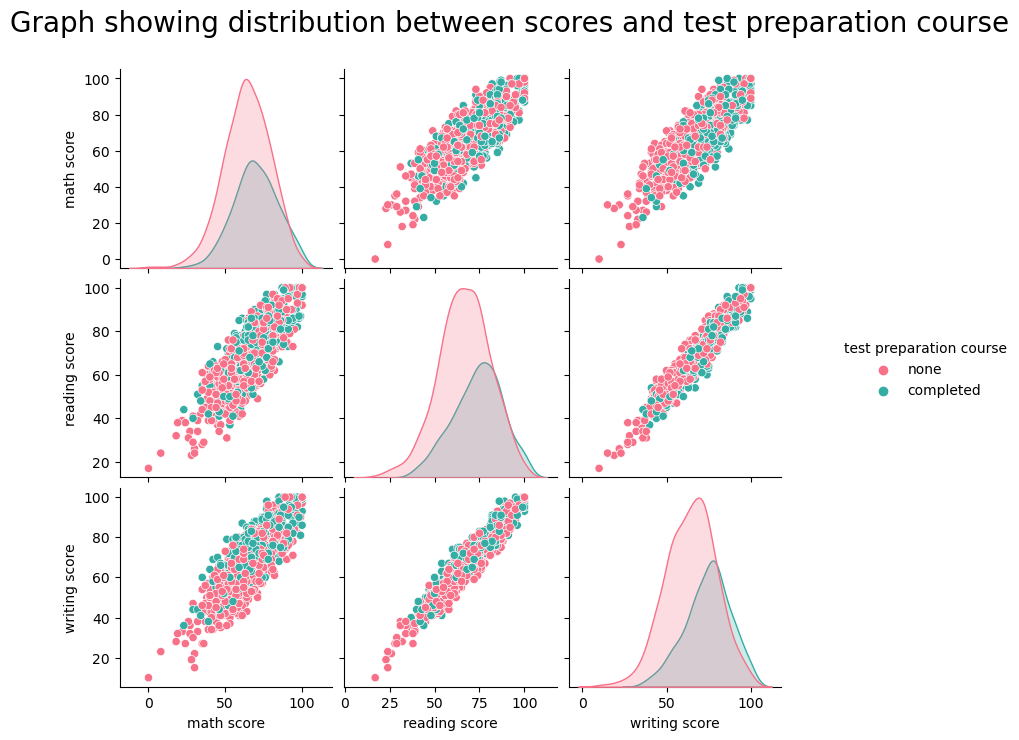

In [8]:
# score and test preparation
distribution(df,'test preparation course')
plt.show()

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


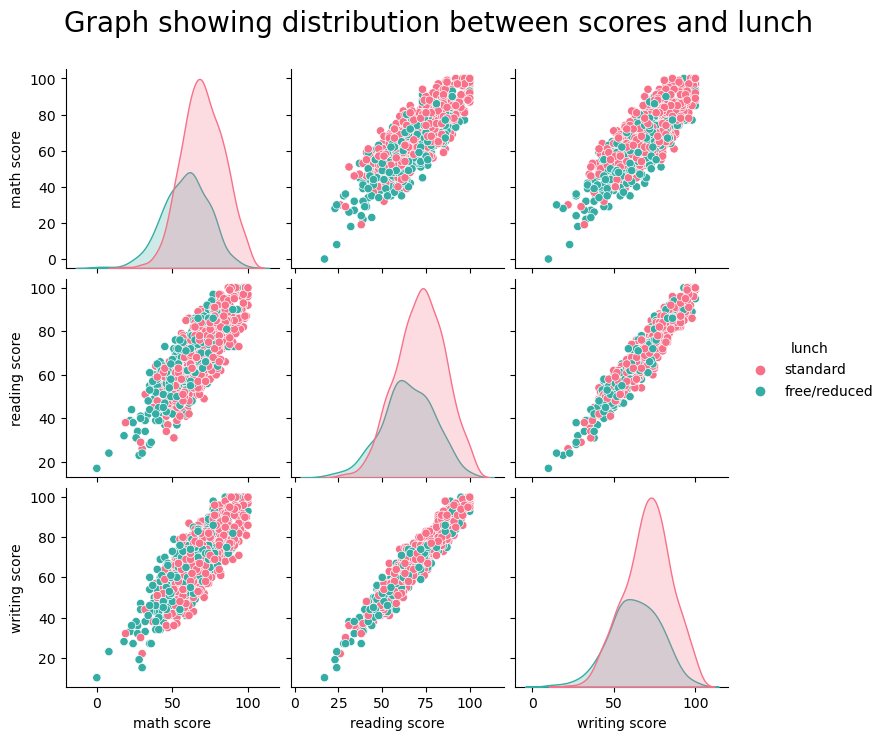

In [9]:
#score and lunch
distribution(df,'lunch')
plt.show()
#Students who ate the standard lunch on average tested higher in all three subjects.

Finding correlation between categorical variables and test scores using 1-Way ANOVA
1-Way ANOVA hypothesis:

Null hypthoesis (H0): There is no difference between groups and equality between means

Alternative hypothesis (H1): There is a difference between the means and groups.

In [10]:
#clean up column names for StatsModels
df.columns = ['gender','race','parental_edu','lunch', 'test_prep_course',
             'math_score','reading_score','writing_score']

#create ANOVA test function   
'''
    Args: 
        data = (DataFrame)
        variable = Categorical column used for 1-way ANOVA test
    Returns: Nothing
'''
def anova_test(data,variable):
    x = ['math_score','reading_score','writing_score']
    for i,k in enumerate(x):
        lm = ols('{}~{}'.format(x[i],variable),data=data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value for one way anova test between {} and {} is: ".format(x[i],variable)
             ,table.loc[variable,'PR(>F)'])
        

In [11]:
# Gender ANOVA
anova_test(df,'gender')
# The p-values are below 0.05 indicating we can reject the null hypothesis. 
#This confirmation shows us there is statistical correlation between test scores and gender

P-value for one way anova test between math_score and gender is:  9.120185549332254e-08
P-value for one way anova test between reading_score and gender is:  4.6805387439362364e-15
P-value for one way anova test between writing_score and gender is:  2.0198777068690013e-22


In [12]:
# Parental Education ANOVA
anova_test(df,'parental_edu')
# The p-values are below 0.05 indicating we can reject the null hypothesis. 
#This confirmation shows us there is statistical correlation between test scores and parental education.

P-value for one way anova test between math_score and parental_edu is:  5.592272384107223e-06
P-value for one way anova test between reading_score and parental_edu is:  1.16824570457051e-08
P-value for one way anova test between writing_score and parental_edu is:  1.1202799969771863e-13


In [13]:
# Lunch ANOVA
anova_test(df,'lunch')
# The p-values are below 0.05 indicating we can reject the null hypothesis. 
#This confirmation shows us there is statistical correlation
#between test scores and what the student ate for lunch.

P-value for one way anova test between math_score and lunch is:  2.4131955993147374e-30
P-value for one way anova test between reading_score and lunch is:  2.0027966545286206e-13
P-value for one way anova test between writing_score and lunch is:  3.1861895831680456e-15


In [14]:
#Test Prep ANOVA
anova_test(df, 'test_prep_course')
# The p-values are below 0.05 indicating we can reject the null hypothesis. 
# This confirmation shows us there is statistical correlation between test scores and 
# what if the student completed a test preparation course.

P-value for one way anova test between math_score and test_prep_course is:  1.5359134607155386e-08
P-value for one way anova test between reading_score and test_prep_course is:  9.081783336895556e-15
P-value for one way anova test between writing_score and test_prep_course is:  3.6852917352476696e-24


In [15]:
#race ANOVA
anova_test(df,'race')

P-value for one way anova test between math_score and race is:  1.3732194030370688e-11
P-value for one way anova test between reading_score and race is:  0.0001780089103235852
P-value for one way anova test between writing_score and race is:  1.0979189070066777e-05


Although we saw statistical significance on parent level of education and student's scores, our pairplot showed us this difference was almost negligble. We will use a counplot below to take a further look at this data.

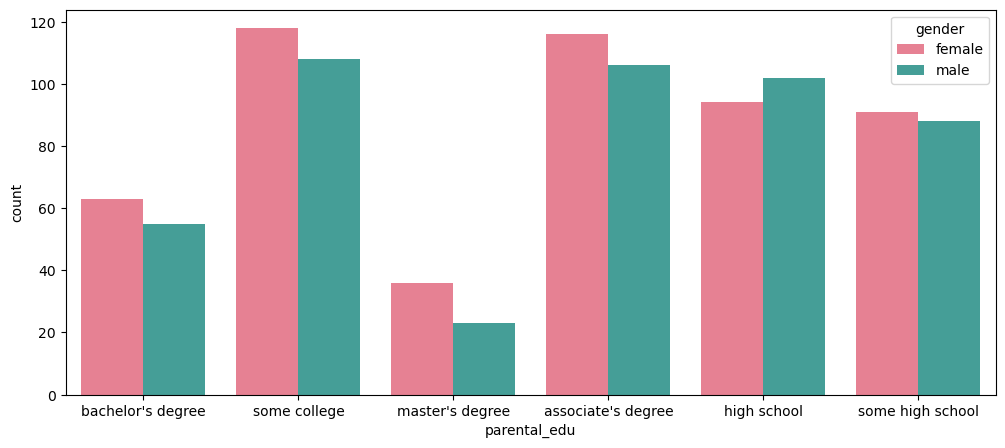

In [24]:
# Create a countplot for the parental education and student scores
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='parental_edu',hue='gender',palette='husl')
plt.show()

## CONCLUSION

1. Females perform higher in reading and writing subjects.
2. Males perform higher in math.
3. Parental education level has a negligble difference in student's test performance.
4. Students who ate the standard lunch tested higher than those who ate a free/reduced meal.
5. Students who completed a test preparation course scored higher than those who did not.

All categorical data was statistically tested against the exam scores using a 1-Way ANOVA test. This test allows us to accurately confirm whether a category of data is correlated to the numerical outcome. Using a 95% confidence internal we acheived p-values < 0.05 for each catergory of data. This allows us to reject our null hypothesis and summize that the catergorical data in this dataset is correlated to the reading, writing, and math scores.